# Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

https://olympus.greatlearning.in/courses/40611/assignments/123620

# Objective
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

# Data Description
 The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc. 

# Data dictionary
- CustomerId: Unique ID which is assigned to each customer
- Surname: Last name of the customer 
- CreditScore: It defines the credit history of the customer.  
- Geography: A customer’s location    
- Gender: It defines the Gender of the customer   
- Age: Age of the customer     
- Tenure: Number of years for which the customer has been with the bank
- NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
- Balance: Account balance
- HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
- EstimatedSalary: Estimated salary 
- isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
- Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )

In [113]:
# Import the standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import tensorflow as tf
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [114]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc

In [115]:
# Option 1 - upload file from google drive
#https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
#Upload file from my Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
# Option 2 - from google.colab import files
#uploaded = files.upload()

# Data Exploration

In [117]:
file_name='/content/drive/MyDrive/Colab Notebooks/intro_to_neural_network/project6/bank.csv'
data = pd.read_csv(file_name)

In [118]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [119]:
data.shape

(10000, 14)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Observations
- DS has 10,000 rows and 14 cols
- 9 variables have data type of int64, 3 variables, and others are float64
- No Null values

In [121]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Observations
- RowNumber, CustomerID - will not use in model - 25% have zero balance.
- EstimatedSalary have a wide range of min of 11 ~ 200K (scaling?)
- Surname will be dropped too, it is not useful in the model

In [122]:
#Check for null data
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Observations
- No null data

In [123]:
# Check for duplicates
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = data[data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


### Observations
- No duplicates

In [124]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [125]:
### Dropping cols not useful for model and copy it out to df - keep data original
df = data.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [126]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Observations
- Geography, Gender are objects -> need encording (one-hot)

# EDA 

In [127]:
# Creating list of continuous and categorical variables
categorical = ['HasCrCard', 'Gender', 'Geography', 'IsActiveMember', 'Age', 'NumOfProducts', 'Tenure']
continuous = ['CreditScore', 'Balance', 'EstimatedSalary']

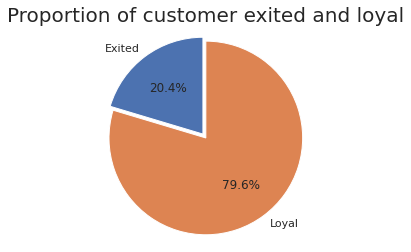

In [128]:
labels = 'Exited', 'Loyal'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.05)
fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.pie(sizes, explode=explode, labels=labels,startangle=90,  autopct='%1.1f%%')
ax1.axis('equal')
plt.title("Proportion of customer exited and loyal", size = 20)
plt.show()

### Observations
- 79% loyal customers
- 20% exited customers

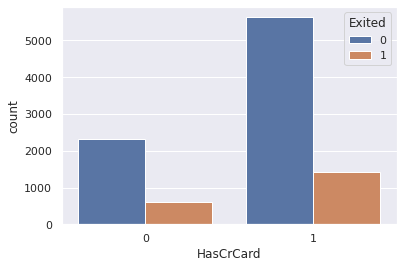

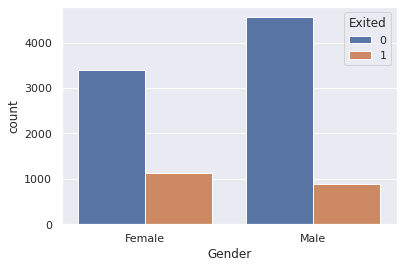

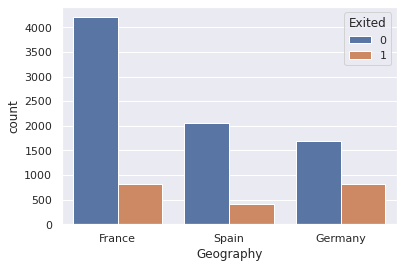

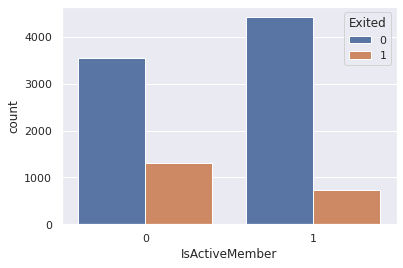

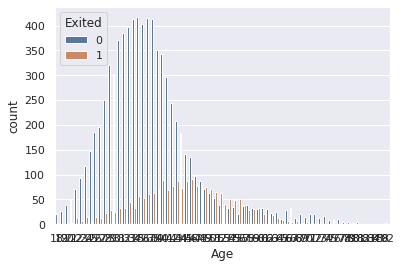

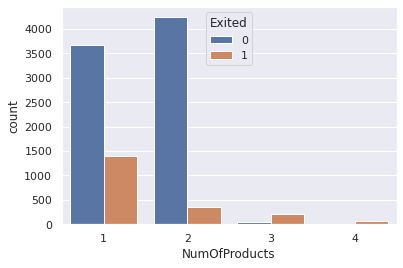

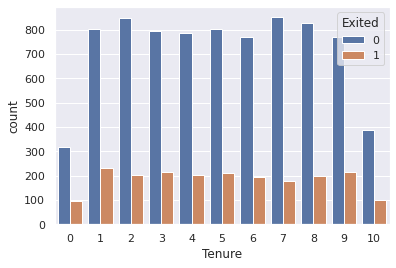

In [129]:
# Count plot EDA on categorical 
for i in categorical:
    sns.countplot (df[i], hue = df['Exited'] );
    plt.show();

In [130]:
# Check pattern by country
df.groupby(by='Geography').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


### Observations
- France/Germany/Spain seems to have more or less same creditscore, tenure age - shows market is quite heterogenous
- Germay shows that Germany has higher blance, more cash, which points that Germany has more savings in their financial habits

In [131]:
df.Gender.value_counts()


Male      5457
Female    4543
Name: Gender, dtype: int64

In [132]:
df_Male = df [df['Gender'] == "Male"]
df_Female = df [df['Gender'] == "Female"]
print(f"% male exited {df_Male[df['Exited'] == 1].shape[0] / df_Male.shape[0] * 100}")
print(f"% female exited {df_Female[df['Exited']==1].shape[0]/df_Female.shape[0] * 100}")

% male exited 16.455928165658786
% female exited 25.071538630860662


### Observations

- Most folks have exited bank have CC
- Male customers > Female customers
- Most cust use more than 2 kinds of financial produces
- germans have higher churn rate


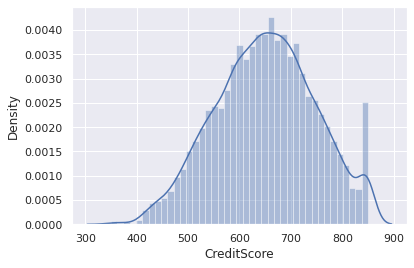

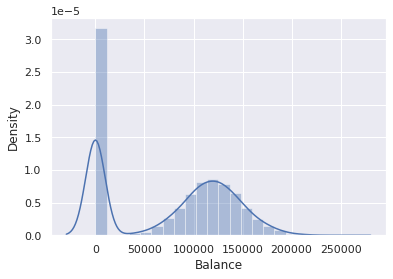

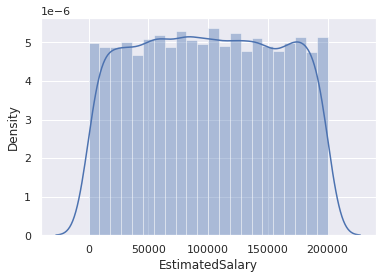

In [133]:
for y in continuous:
    sns.distplot(a = df[y], kde=True)
    plt.show()

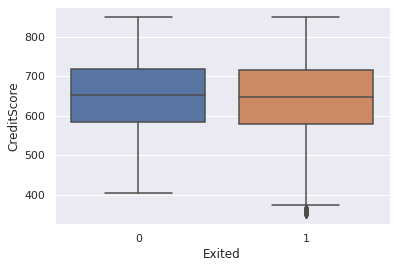

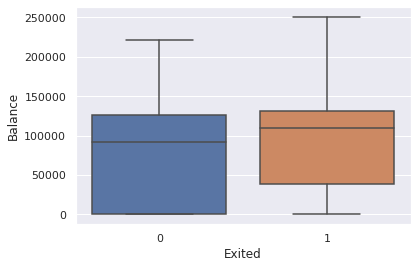

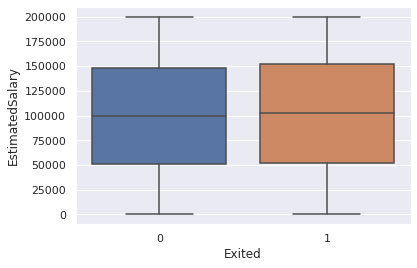

In [134]:
for y in continuous:
    sns.boxplot(x = 'Exited', y = df[y], data = df)
    plt.show()

In [135]:
# Scan who might have low balance
df[df['Balance'] == 0].count()

CreditScore        3617
Geography          3617
Gender             3617
Age                3617
Tenure             3617
Balance            3617
NumOfProducts      3617
HasCrCard          3617
IsActiveMember     3617
EstimatedSalary    3617
Exited             3617
dtype: int64

### Observations
- 3617 customers have zero balance! 

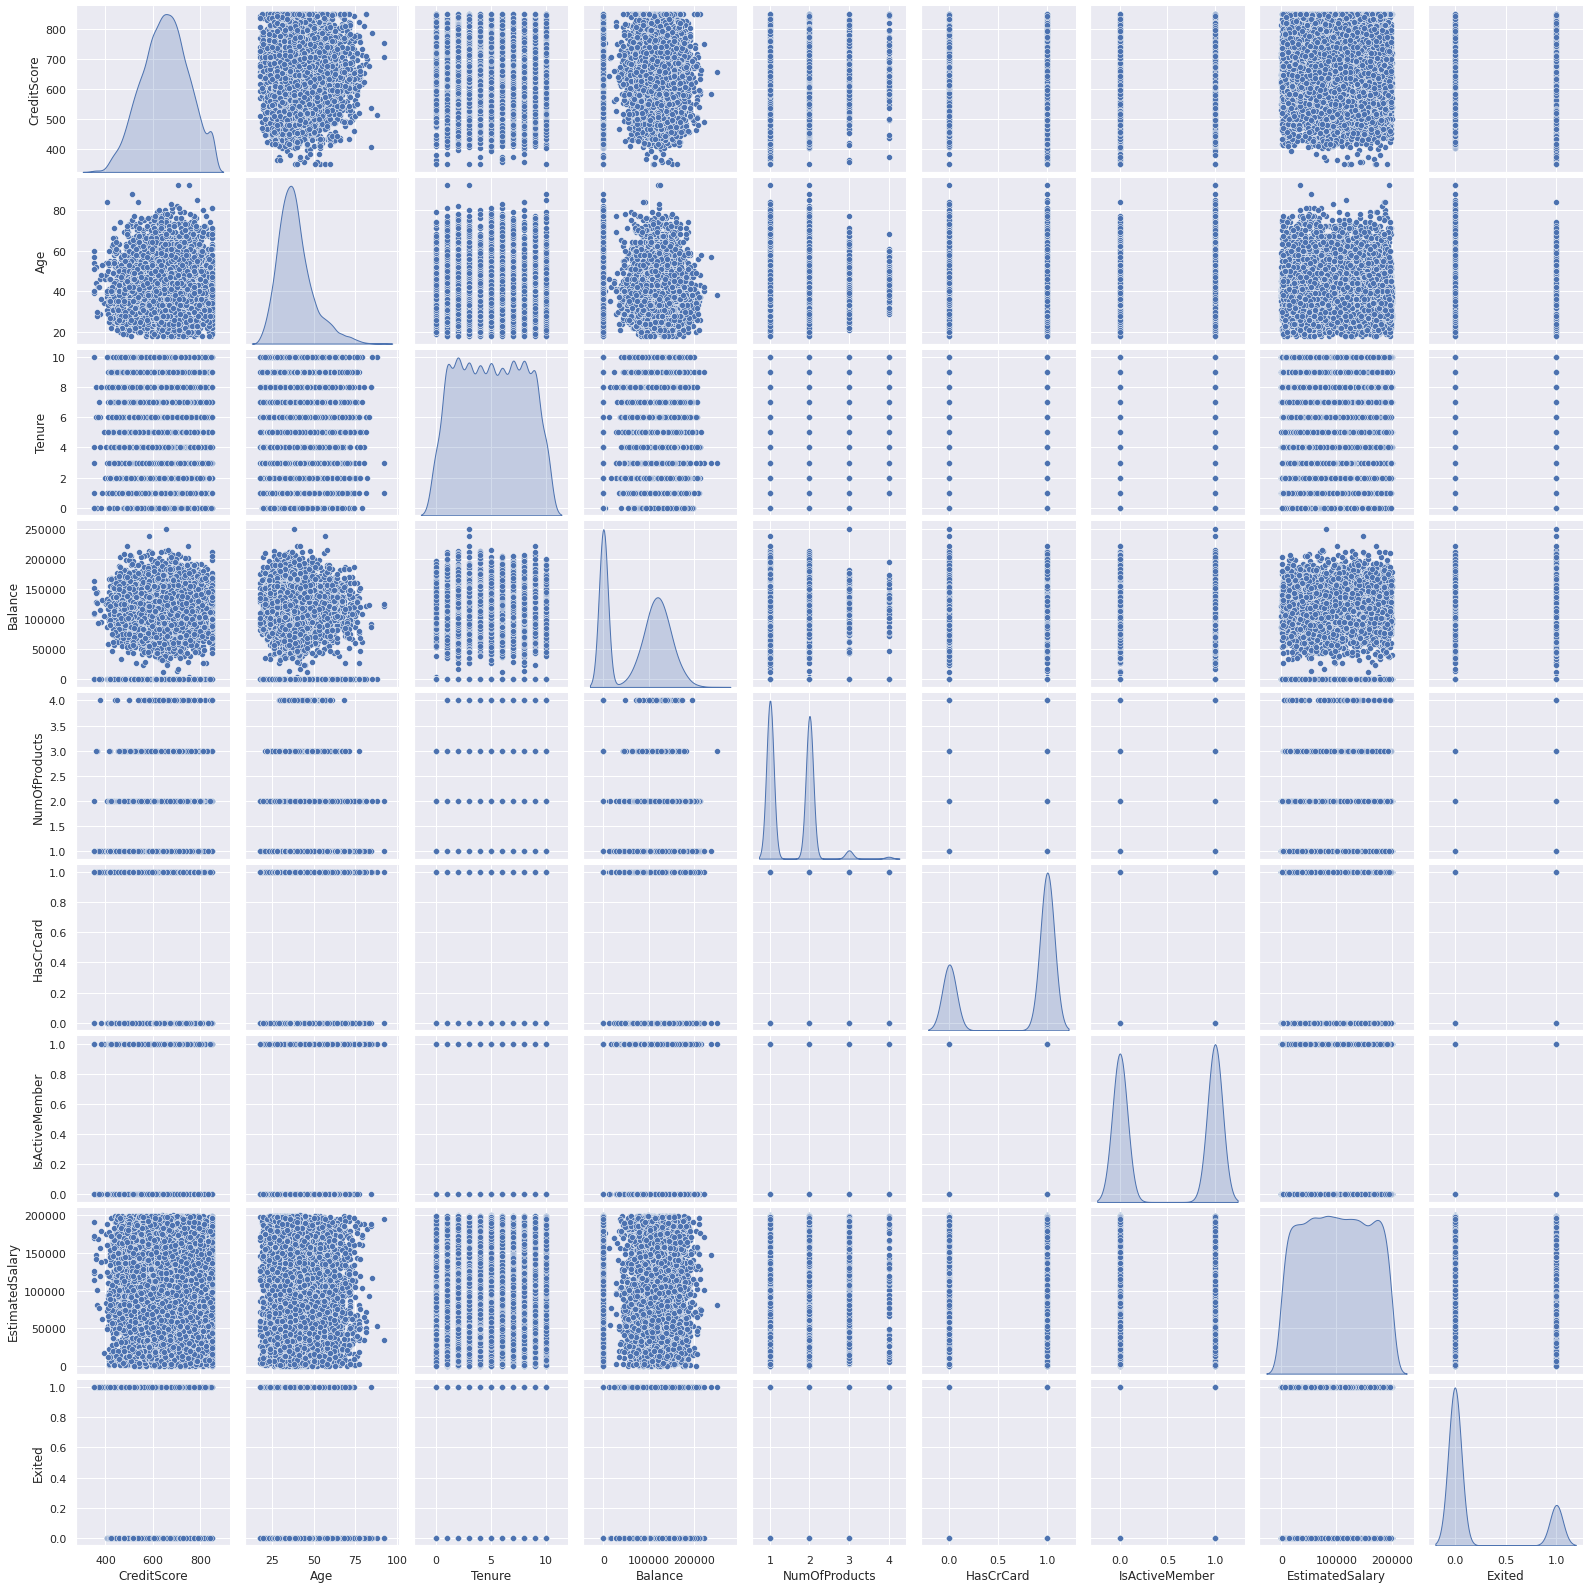

In [136]:
sns.pairplot(df,diag_kind='kde');

### Observations
- Sadly I don't see any correlation between continuous variables

## Data pre-processing

In [137]:
df1 = pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)
df1.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0


In [138]:
# Convert geo and genter to categorical variales for model
X = df1.drop(['Exited'], axis=1)
y = df1.Exited
print(X.shape)

(10000, 11)


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21, stratify=y)

In [140]:
print("Training churn customers    : {0} ({1:.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training loyal customer     : {0} ({1:.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("-------------------------------------------------------------------------")
print("Test churn customers        : {0} ({1:.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test loyal customer         : {0} ({1:.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))

Training churn customers    : 1426 (20.37%)
Training loyal customer     : 5574 (79.63%)
-------------------------------------------------------------------------
Test churn customers        : 611 (20.37%)
Test loyal customer         : 2389 (79.63%)


### Observation
- split comparable between train / test data

In [141]:
# Normalize using standard scale
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [142]:
# Use sequential modelusing relu, tanh, sigmoid for activation - the more the merrier
model = Sequential()
model.add(Dense(50, input_shape = (11,), activation = 'relu'))
model.add(Dense(25, activation = 'tanh'))
model.add(Dense(1,activation = 'sigmoid'))
sgd = optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics = ['accuracy'])

In [143]:
#summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 50)                600       
                                                                 
 dense_22 (Dense)            (None, 25)                1275      
                                                                 
 dense_23 (Dense)            (None, 1)                 26        
                                                                 
Total params: 1,901
Trainable params: 1,901
Non-trainable params: 0
_________________________________________________________________


In [144]:
model.fit(X_train, y_train.values, batch_size = 50, validation_split=0.2, epochs = 100, verbose=2)

Epoch 1/100
112/112 - 1s - loss: 0.4480 - accuracy: 0.8032 - val_loss: 0.4267 - val_accuracy: 0.8043 - 525ms/epoch - 5ms/step
Epoch 2/100
112/112 - 0s - loss: 0.4093 - accuracy: 0.8243 - val_loss: 0.4023 - val_accuracy: 0.8307 - 136ms/epoch - 1ms/step
Epoch 3/100
112/112 - 0s - loss: 0.3876 - accuracy: 0.8359 - val_loss: 0.3829 - val_accuracy: 0.8507 - 136ms/epoch - 1ms/step
Epoch 4/100
112/112 - 0s - loss: 0.3679 - accuracy: 0.8461 - val_loss: 0.3706 - val_accuracy: 0.8514 - 137ms/epoch - 1ms/step
Epoch 5/100
112/112 - 0s - loss: 0.3560 - accuracy: 0.8557 - val_loss: 0.3627 - val_accuracy: 0.8650 - 136ms/epoch - 1ms/step
Epoch 6/100
112/112 - 0s - loss: 0.3492 - accuracy: 0.8552 - val_loss: 0.3628 - val_accuracy: 0.8543 - 141ms/epoch - 1ms/step
Epoch 7/100
112/112 - 0s - loss: 0.3453 - accuracy: 0.8577 - val_loss: 0.3607 - val_accuracy: 0.8593 - 137ms/epoch - 1ms/step
Epoch 8/100
112/112 - 0s - loss: 0.3428 - accuracy: 0.8579 - val_loss: 0.3593 - val_accuracy: 0.8536 - 139ms/epoch - 1

### Observations
- after each epoch, loss decreases and accuracy goes up


In [145]:
# Eval model apnd print results
r = model.evaluate(X_test, y_test.values, verbose=2)

94/94 - 0s - loss: 0.4065 - accuracy: 0.8377 - 206ms/epoch - 2ms/step


In [146]:
print(model.metrics_names)
print(r)    

['loss', 'accuracy']
[0.4065294861793518, 0.8376666903495789]


In [147]:
# test and predict 
y_predict = model.predict(X_test)
y_predict_original = np.round(y_predict).astype(int)

In [148]:
def get_confusion_matrix (actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm,annot = True, fmt='0.1f')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
    print('hello')

In [149]:
Recall_original = recall_score(y_test, y_predict_original)
Precision_original = precision_score(y_test, y_predict_original)
F1_score_original = f1_score(y_test, y_predict_original)
Accuracy_original = accuracy_score (y_test, y_predict_original)
ROC_original = roc_auc_score(y_test,y_predict_original)

In [150]:
m = pd.DataFrame([Recall_original, Precision_original, F1_score_original,Accuracy_original, 
                            ROC_original], 
                           index = ['Recall','Precision', 'F1_score', 'Accuracy', 'ROC Auc Score'],
                           columns = ['Default Threshold'])
m

,Default Threshold
Recall,0.581015
Precision,0.605802
F1_score,0.593150
Accuracy,0.837667
ROC Auc Score,0.742161


### Observations
- Threshold = 0.5 from above

In [151]:
thr = 0.5
y_predict_point5_threshold = np.where (y_predict>=thr,1,0)

Confusion Matrix


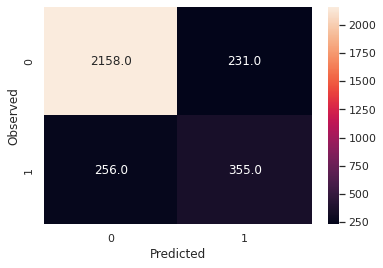

hello
None


In [152]:
# Print CM to see what is up 
print ('Confusion Matrix')
print(get_confusion_matrix(y_test, y_predict_point5_threshold))

In [153]:
recall_point5_threshold = recall_score(y_test, y_predict_point5_threshold)
precision_point5_threshold = precision_score(y_test, y_predict_point5_threshold)
F1_score_point5_threshold = f1_score(y_test, y_predict_point5_threshold)
accuracy_point5_threshold  = accuracy_score (y_test, y_predict_point5_threshold)
ROC_point5_threshold = roc_auc_score(y_test,y_predict_point5_threshold)

In [154]:
# Threshold = 0.5
m ['0.5 Threshold'] = [recall_point5_threshold ,precision_point5_threshold, F1_score_point5_threshold,
                                Accuracy_point5_threshold, ROC_point5_threshold ]
m

,Default Threshold,0.5 Threshold
Recall,0.581015,0.581015
Precision,0.605802,0.605802
F1_score,0.593150,0.593150
Accuracy,0.837667,0.845000
ROC Auc Score,0.742161,0.742161


Confusion Matrix - threshold :0.4



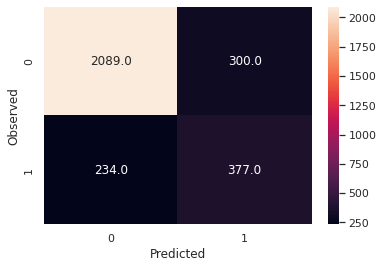

hello
None
               Default Threshold  0.5 Threshold
Recall                  0.581015       0.617021
Precision               0.605802       0.556869
F1_score                0.593150       0.585404
Accuracy                0.837667       0.822000
ROC Auc Score           0.742161       0.745723
Confusion Matrix - threshold :0.5



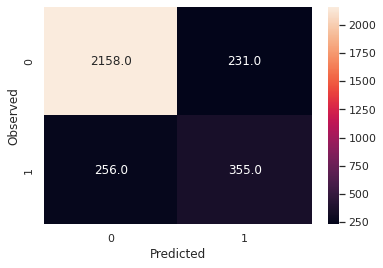

hello
None
               Default Threshold  0.5 Threshold
Recall                  0.581015       0.581015
Precision               0.605802       0.605802
F1_score                0.593150       0.593150
Accuracy                0.837667       0.837667
ROC Auc Score           0.742161       0.742161
Confusion Matrix - threshold :0.6



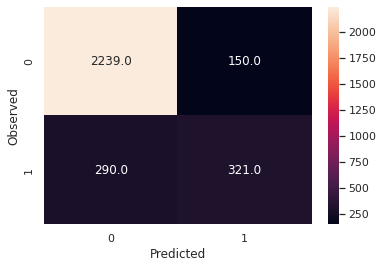

hello
None
               Default Threshold  0.5 Threshold
Recall                  0.581015       0.525368
Precision               0.605802       0.681529
F1_score                0.593150       0.593346
Accuracy                0.837667       0.853333
ROC Auc Score           0.742161       0.731290


In [155]:
# Let us see how it is works with threshhold 0.3 and 0.6
thr_list = [0.4, 0.5, 0.6,]

for thr in thr_list:
    y_predict_threshold= np.where (y_predict>=thr,1,0)

    # Print CM to see what is up 
    print (f'Confusion Matrix - threshold :{thr}')
    print()
    print(get_confusion_matrix(y_test, y_predict_threshold))


    recall_threshold = recall_score(y_test, y_predict_threshold)
    precision_threshold = precision_score(y_test, y_predict_threshold)
    F1_score_threshold = f1_score(y_test, y_predict_threshold)
    accuracy_threshold  = accuracy_score (y_test, y_predict_threshold)
    ROC_threshold = roc_auc_score(y_test,y_predict_threshold)


    # Threshold = 0.5
    m ['0.5 Threshold'] = [recall_threshold ,precision_threshold, F1_score_threshold,
                                    accuracy_threshold, ROC_threshold ]
    print(m)


### Obervation
- 0.85 our algo can differentiate between +ve and -ve classes - not bad

# Conclusions
- Model is most stable when threshold is 0.5. Accuracy is highest at 0.85, precision .65, recall 0.51
- Threshold can be tuned to get the optimal value
- Resampling techniques can be applied to balanced the data and then train the model
- Hyperparameter tuning can be applied to tune the different Hyperparameters
- Using this model bank can target specifc people to reduce churn recall_threshold